In [1]:
import math, cmath
import os
from typing import Optional, Tuple, Union

from matplotlib import pyplot as plt
from tqdm import tqdm_notebook
import numpy as np

%matplotlib inline

##  Parallel Bifurcation

Run experiments with different number of processes. Use larger number of iterations to better speedup estimations.

In [55]:
if os.path.exists('times'):
    os.remove('times')
for i in tqdm_notebook(range(1, 13)):
    os.system(f'mpirun -n {i} python parallel_bifurcation.py --return_time -n_rs=16000')

Gather information about calculation times

In [56]:
proc_times = {}

with open('times', 'r') as f:
    for line in f.readlines():
        proc, times = line.strip().split()
        proc_times[int(proc)] = float(times)

In [57]:
initial_time = proc_times[1]
proc_times

{1: 8.6507,
 2: 4.4609,
 3: 3.2257,
 4: 3.9644,
 5: 6.0951,
 6: 5.2229,
 7: 4.6504,
 8: 4.3121,
 9: 4.3952,
 10: 4.7568,
 11: 5.2556,
 12: 4.5202}

Show the speedup

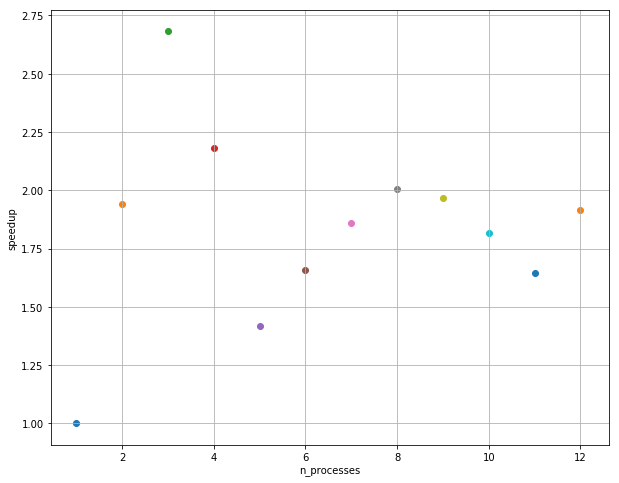

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for n_proc, time in proc_times.items():
    ax.scatter(n_proc, initial_time / time)

ax.grid()
ax.set_xlabel('n_processes')
ax.set_ylabel('speedup')

fig.savefig('img/speedup.png')

Show that graph is calculated correctly. The script will save the bifurcation map to "plot_(n_processes).png". 

In [59]:
test_n_processes = 4
os.system(f'mpirun -n {test_n_processes} python parallel_bifurcation.py --compute_graph -n_rs=4000')

0